## Setup

In [1]:
import torch
import cv2 as cv
import yaml, os
import torch, os, yaml
from utils.encoder import *
from utils.llm import *
from utils.dataset import *
from transformers import CLIPImageProcessor, AutoProcessor
from transformers.utils import logging
from utils.demo_utils import *
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
from utils.dataset import get_frames
from torchvision import transforms


# Run settings
run_type = f"demo"
demo_config_path = f'../configs/{run_type}.yaml'
demo_configs = yaml.safe_load(open(demo_config_path))
device = f'cuda:{demo_configs["cuda"]}'
load_exp_path = demo_configs["load_exp_path"]
f = open(demo_configs["gpu_config"])
gpu_config = json.load(f)
demo_path = demo_configs["demo_path"]
chat_path = demo_configs["chat_path"]

# RAG
# Old encoder
# tactile_vificlip, dotted_tactile_adapter, plain_tactile_adapter, property_classifier, load_exp_configs = load_encoder(demo_configs, device)
tactile_vificlip, tactile_adapter, property_classifier, load_exp_configs = load_encoder(demo_configs, device)
image_transforms = get_image_transforms(load_exp_configs["frame_size"], "physiclear", split_name="test", flip_p=0) # NOTE: Assume the tactile inputs uses non-dotted GelSight Mini
if demo_configs["rag"]:
    if demo_configs["rag_generate_embeddings"]:
        print("\nGenerating RAG embeddings...")
        generate_rag_embeddings(demo_configs, load_exp_configs, tactile_vificlip, device, demo_configs["rag_sample_dir"], demo_configs["embedding_dir"])
    del tactile_adapter
    del property_classifier
    saved_embeddings, sample_tactile_paths, rag_object_ids = get_rag_embeddings(demo_configs, device)
else:
    tactile_vificlip = None
    saved_embeddings = None
    sample_tactile_paths = None
    rag_object_ids = None

# Load models
load_exp_configs = yaml.safe_load(open(os.path.join(load_exp_path, "run.yaml")))
peft = "peft" in demo_configs["load_exp_path"]
tokenizer_path, model_path, new_tokens, no_split_module_classes = get_model_details(load_exp_configs["model_type"])
load_exp_configs.update(demo_configs)
start = datetime.now()
model = load_mllm(load_exp_configs, tokenizer_path, model_path, new_tokens, no_split_module_classes, peft, device, gpu_config, exp_id=None)
if load_exp_configs["use_clip"]:
    image_processor = CLIPImageProcessor.from_pretrained(load_exp_configs["use_clip"])
end = datetime.now()
elapsed = (end - start).total_seconds()
print(f"Loaded model in {elapsed} seconds.")

Some weights of PromptLearningCLIPModel were not initialized from the model checkpoint at openai/clip-vit-large-patch14 and are newly initialized: ['text_model.VPT', 'text_model.encoder.layers.0.VPT_gamma', 'text_model.encoder.layers.1.VPT_gamma', 'text_model.encoder.layers.1.VPT_shallow', 'text_model.encoder.layers.10.VPT_gamma', 'text_model.encoder.layers.10.VPT_shallow', 'text_model.encoder.layers.11.VPT_shallow', 'text_model.encoder.layers.2.VPT_gamma', 'text_model.encoder.layers.2.VPT_shallow', 'text_model.encoder.layers.3.VPT_gamma', 'text_model.encoder.layers.3.VPT_shallow', 'text_model.encoder.layers.4.VPT_gamma', 'text_model.encoder.layers.4.VPT_shallow', 'text_model.encoder.layers.5.VPT_gamma', 'text_model.encoder.layers.5.VPT_shallow', 'text_model.encoder.layers.6.VPT_gamma', 'text_model.encoder.layers.6.VPT_shallow', 'text_model.encoder.layers.7.VPT_gamma', 'text_model.encoder.layers.7.VPT_shallow', 'text_model.encoder.layers.8.VPT_gamma', 'text_model.encoder.layers.8.VPT_s

Loaded tactile ViFi-CLIP!
Loaded tactile adapter!
Loaded property regression model!

Loading trained tokenizer...


Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}
`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Unrecognized keys in `rope_scaling` for 'rope_type'='default': {'mrope_section'}


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

/home/user/.conda/envs/octopis/lib/python3.8/site-packages/transformers/models/auto/tokenization_auto.py:796: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


0 tokens added to tokenizer.
Tokenizer BOS: None, EOS: <|im_end|>, Pad: <|endoftext|>


/home/user/.conda/envs/octopis/lib/python3.8/site-packages/peft/utils/save_and_load.py:198: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  adapters_weights = torch.load(filen

Loaded trained PEFT LLM!
Loaded LLM and tokenizer!



Some weights of PromptLearningCLIPModel were not initialized from the model checkpoint at openai/clip-vit-large-patch14 and are newly initialized: ['text_model.VPT', 'text_model.encoder.layers.0.VPT_gamma', 'text_model.encoder.layers.1.VPT_gamma', 'text_model.encoder.layers.1.VPT_shallow', 'text_model.encoder.layers.10.VPT_gamma', 'text_model.encoder.layers.10.VPT_shallow', 'text_model.encoder.layers.11.VPT_shallow', 'text_model.encoder.layers.2.VPT_gamma', 'text_model.encoder.layers.2.VPT_shallow', 'text_model.encoder.layers.3.VPT_gamma', 'text_model.encoder.layers.3.VPT_shallow', 'text_model.encoder.layers.4.VPT_gamma', 'text_model.encoder.layers.4.VPT_shallow', 'text_model.encoder.layers.5.VPT_gamma', 'text_model.encoder.layers.5.VPT_shallow', 'text_model.encoder.layers.6.VPT_gamma', 'text_model.encoder.layers.6.VPT_shallow', 'text_model.encoder.layers.7.VPT_gamma', 'text_model.encoder.layers.7.VPT_shallow', 'text_model.encoder.layers.8.VPT_gamma', 'text_model.encoder.layers.8.VPT_s

Loaded tactile ViFi-CLIP!
Loaded tactile adapter!
Loaded property regression model!

Loaded trained projection module!
Loaded model in 68.655426 seconds.


## Helper Functions

In [4]:
def plot_frames_inline(sample_path, image_transforms):
    plt.rcParams['figure.dpi'] = 200
    rows = 1
    columns = 10
    f, arr = plt.subplots(rows, columns)
    mean, std = get_dataset_img_norm("physiclear") # NOTE: Assume the tactile inputs uses non-dotted GelSight Mini
    inverse_transforms_list = [
        transforms.Normalize(
            mean=[-mean[0]/std[0], -mean[1]/std[1], -mean[2]/std[2]],
            std=[1/std[0], 1/std[1], 1/std[2]]
        ),
    ]
    inverse_transforms = transforms.Compose(inverse_transforms_list)
    image_tensors = inverse_transforms(get_frames(sample_path, None, image_transforms, frame_size=load_exp_configs["frame_size"], train=False))
    padding_size = rows * columns - image_tensors.shape[0]
    if padding_size > 0:
        padding = torch.stack([image_tensors[-1]] * padding_size, dim=0)
        image_tensors = torch.cat([image_tensors, padding], dim=0)
    for i in range(len(image_tensors)):
        arr[int(i%columns)].axis('off')
        arr[int(i%columns)].imshow(image_tensors[i].cpu().numpy().transpose(1,2,0))
    plt.tight_layout()
    plt.show()
    

def get_all_embeds(user_input, prev_embeds, configs, tokenizer):
    if "$" in user_input:
        user_input = user_input.strip()
        if "$dr" in user_input:
            describe = True
            rank = True
        elif "$d" in user_input:
            describe = True
            rank = False
        elif "$r" in user_input:
            describe = False
            rank = True
        object_ids = user_input.split("(")[-1].replace(")", "")
        object_ids = [int(i.strip()) for i in object_ids.split(",")]
        generation, all_embeds, question, tactile_paths_flattened = describe_rank(model, tactile_vificlip, demo_configs, load_exp_configs, object_ids, image_transforms, device, image_processor, new_tokens, saved_embeddings, sample_tactile_paths, rag_object_ids, prev_embeds, describe, rank)
        question = question.replace("]", "[").split("[") # NOTE: Assume the tactile inputs uses the non-dotted GelSight Mini
        print(f"###### USER: {question[0]}\n", flush=True)
        tactile_count = 0
        for chunk in question[1:]:
            if "frames" in chunk:
                plot_frames_inline(tactile_paths_flattened[tactile_count], image_transforms)
                tactile_count += 1
            else:
                print(chunk, flush=True)
    else:
        print(f"###### USER: {user_input}\n")
        messages = [
            {"role": "user", "content": user_input}
        ]
        question_template = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        question_embeds = process_user_input(question_template, image_processor, model, tokenizer, device, new_tokens, configs["frame_size"], image_transforms)
        generation, generation_embeds, question_embeds = generate(question_embeds, model, demo_configs["max_new_tokens"], prev_embeds=prev_embeds)
        all_embeds = torch.cat([question_embeds, generation_embeds], dim=1)
    return all_embeds, generation

## Interact

###### USER: Describe the object in the following tactile video(s).

Object 6: 



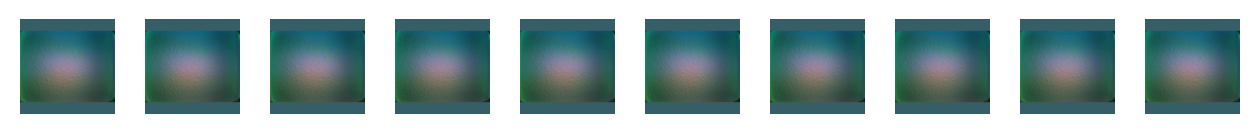


###### ASSISTANT: Object 6: slightly rough, squishy, soft, fuzzy.
Most similar objects (in order of decreasing similarity): an unpeeled, overripe kiwi (fuzzy, slightly rough, soft, squishy);<|im_end|>



In [5]:
from IPython.display import clear_output

with torch.no_grad():
    user_input = input(f"USER: ")
    while user_input == "restart":
        clear_output(wait=True)
        user_input = input(f"USER: ")
    all_embeds = None
    all_embeds, generation = get_all_embeds(user_input, all_embeds, load_exp_configs, model.tokenizer)
    print(f"###### ASSISTANT: {generation}\n", flush=True)
    user_input = input("USER: ")

    while user_input.strip() != "exit":
        if user_input == "restart":
            clear_output(wait=True)
            all_embeds = None
            user_input = input(f"USER: ")
        elif len(user_input) == 0:
            user_input = input(f"USER: ")
        else:
            all_embeds, generation = get_all_embeds(user_input, all_embeds, load_exp_configs, model.tokenizer)
            print(f"###### ASSISTANT: {generation}\n", flush=True)
            user_input = input("USER: ")